SME0202 Métodos Numéricos em Equações Diferenciais Ordinárias
### Trabalho 1 - Equações Elípticas - Meios Anisotrópicos e Termo de Arraste
- Cody Stefano Barham Setti - 4856322
- Ian de Holanda Cavalcante Bezerra - 13835412

# Importando Pacotes

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Preparando Constantes e Funcao para Solucao Exata

In [2]:
# Constante C
c = 4*np.pi**2 -3


# Solucao Exata do Problema

def u(x,y):
    return np.exp(-y)*np.sin(2*np.pi*x)

In [3]:

def print_matrix(matrix):  # Funcao auxiliar para printar uma matriz de forma organizada
    # Pega a largura máxima precisa para qualquer elemento
    max_width = max(len(str(element)) for row in matrix for element in row)
    
    for line in matrix:
        # Formata cada elemento para que tenha largura consistente
        formatted_row = [str(element).rjust(max_width) for element in line]
        print(" ".join(formatted_row))


# Criando Objetos POO para melhor organizacao do codigo

In [4]:

#----------// Objeto Ponto //------------------------------

class Ponto:
    def __init__(self, i, j, n):
        self.i = i
        self.j = j
        self.x = 0
        self.y = 0
        self.exact = 0
        self.ui = self.get_1d_index(i, j, n)

    def get_1d_index(self, i, j, n):   # Pega o indice unidimensional do ponto
        return (j + i * n)
    
    def __str__(self):   # Retorna o ponto formatado como (i, j)
        return f"({self.i}, {self.j})"


#----------// Objeto Mesh //------------------------------


class Mesh:
    def __init__(self, m, n):
        self.m = m
        self.n = n
        self.mesh = []
        self.create_mesh()


    def create_mesh(self):  # Cria a malha de pontos no array self.mesh
        for i in range(self.m):
            line = []
            for j in range(self.n):
                line.append(Ponto(i, j, self.n))
            self.mesh.append(line)


    def get_unkown_points(self):   # Corta os pontos do bordo da malha e cria uma nova malha
        temp = Mesh(self.m, self.n)
        for i in range(self.m):
            temp.mesh[i].remove(temp.mesh[i][0])
            temp.mesh[i].remove(temp.mesh[i][-1])
        temp.n -= 2
        temp.recalculate_ui()
        return temp


    def recalculate_ui(self):   # Recalcula o indice unidimensional ui para cada ponto
        for i in range(self.m):
            for j in range(self.n):
                self.mesh[i][j].ui = self.mesh[i][j].get_1d_index(i, j, self.n)


    def __str__(self):  # Retorna a malha formatada como (i, j)
        output = "--------------------------------------\n"
        for line in self.mesh:
            for point in line:
                output += f"{point}  "
            output += "\n"
        
        output += "--------------------------------------\n"
        output += f"{self.m} linhas e {self.n} colunas"
        return output


    def print_unkown_points(self):  # Printa a malha unidimensional ui
        print("--------------------------------------")
        print("Enumeração Unidimensional da Malha:")
        for line in self.mesh:
            for point in line:
                if (point.ui < 10):
                    print(f"(  {point.ui} )", end="  ")  
                else:
                    print(f"( {point.ui} )", end="  ")   
            print()
        print("--------------------------------------")


    def __getitem__(self, index):    # Cria de operador [] para acessar o array direto do objeto
        if index < len(self.mesh):
            return self.mesh[index]
        else:
            raise IndexError("Index out of range")


    def populate_coordinates(self, h):  # Popula cordenadas (x, y) apartir de (i, j)
        x = np.arange(0,1+h, h)    
        y = np.arange(1,-1-h, -h)  

        for line in self.mesh:
            for point in line:
                point.x = x[point.j]  
                point.y = y[point.i]  


    def exact_solution(self, h):     # Popula o campo de solucao exata no objeto ponto
        for line in self.mesh:
            for point in line:
                point.exact = np.exp(-point.y)*np.sin(2*np.pi*point.x)

# Criando Malhas: Fisica, Incognitas

In [5]:
# DISCRETIZAÇÃO DO DOMÍNIO
h = 0.125 # tamanho de passo

x = np.arange(0,1+h, h)   # discretização do eixo-x
y = np.arange(1,-1-h, -h)  # discretização do eixo-y

n = len(x)  # número de COLUNAS na malha
m = len(y)  # número de LINHAS da malha

print(f"n: {n}, m: {m}")

Malha = Mesh(m, n)
Malha.populate_coordinates(h)
Malha.exact_solution(h)
print(Malha)

"""
# Como usamos o getitem, podemos acessar os pontos da malha diretamente. 
# sem nessecidade de usar .mesh

print(Malha[0][0].y)
print(Malha[0][0].x)

"""


n: 9, m: 17
--------------------------------------
(0, 0)  (0, 1)  (0, 2)  (0, 3)  (0, 4)  (0, 5)  (0, 6)  (0, 7)  (0, 8)  
(1, 0)  (1, 1)  (1, 2)  (1, 3)  (1, 4)  (1, 5)  (1, 6)  (1, 7)  (1, 8)  
(2, 0)  (2, 1)  (2, 2)  (2, 3)  (2, 4)  (2, 5)  (2, 6)  (2, 7)  (2, 8)  
(3, 0)  (3, 1)  (3, 2)  (3, 3)  (3, 4)  (3, 5)  (3, 6)  (3, 7)  (3, 8)  
(4, 0)  (4, 1)  (4, 2)  (4, 3)  (4, 4)  (4, 5)  (4, 6)  (4, 7)  (4, 8)  
(5, 0)  (5, 1)  (5, 2)  (5, 3)  (5, 4)  (5, 5)  (5, 6)  (5, 7)  (5, 8)  
(6, 0)  (6, 1)  (6, 2)  (6, 3)  (6, 4)  (6, 5)  (6, 6)  (6, 7)  (6, 8)  
(7, 0)  (7, 1)  (7, 2)  (7, 3)  (7, 4)  (7, 5)  (7, 6)  (7, 7)  (7, 8)  
(8, 0)  (8, 1)  (8, 2)  (8, 3)  (8, 4)  (8, 5)  (8, 6)  (8, 7)  (8, 8)  
(9, 0)  (9, 1)  (9, 2)  (9, 3)  (9, 4)  (9, 5)  (9, 6)  (9, 7)  (9, 8)  
(10, 0)  (10, 1)  (10, 2)  (10, 3)  (10, 4)  (10, 5)  (10, 6)  (10, 7)  (10, 8)  
(11, 0)  (11, 1)  (11, 2)  (11, 3)  (11, 4)  (11, 5)  (11, 6)  (11, 7)  (11, 8)  
(12, 0)  (12, 1)  (12, 2)  (12, 3)  (12, 4)  (12, 5)  (

'\n# Como usamos o getitem, podemos acessar os pontos da malha diretamente. \n# sem nessecidade de usar .mesh\n\nprint(Malha[0][0].y)\nprint(Malha[0][0].x)\n\n'

In [6]:
# Criando a malha de incógnitas
Us = Malha.get_unkown_points()  # Retorna a malha sem os pontos do bordo
Us.populate_coordinates(h)  # Popula as coordenadas unidimensionais ui dos pontos


# Printando a malha (i,j) e a malha unidimensional ui
print(Us)
Us.print_unkown_points()

--------------------------------------
(0, 1)  (0, 2)  (0, 3)  (0, 4)  (0, 5)  (0, 6)  (0, 7)  
(1, 1)  (1, 2)  (1, 3)  (1, 4)  (1, 5)  (1, 6)  (1, 7)  
(2, 1)  (2, 2)  (2, 3)  (2, 4)  (2, 5)  (2, 6)  (2, 7)  
(3, 1)  (3, 2)  (3, 3)  (3, 4)  (3, 5)  (3, 6)  (3, 7)  
(4, 1)  (4, 2)  (4, 3)  (4, 4)  (4, 5)  (4, 6)  (4, 7)  
(5, 1)  (5, 2)  (5, 3)  (5, 4)  (5, 5)  (5, 6)  (5, 7)  
(6, 1)  (6, 2)  (6, 3)  (6, 4)  (6, 5)  (6, 6)  (6, 7)  
(7, 1)  (7, 2)  (7, 3)  (7, 4)  (7, 5)  (7, 6)  (7, 7)  
(8, 1)  (8, 2)  (8, 3)  (8, 4)  (8, 5)  (8, 6)  (8, 7)  
(9, 1)  (9, 2)  (9, 3)  (9, 4)  (9, 5)  (9, 6)  (9, 7)  
(10, 1)  (10, 2)  (10, 3)  (10, 4)  (10, 5)  (10, 6)  (10, 7)  
(11, 1)  (11, 2)  (11, 3)  (11, 4)  (11, 5)  (11, 6)  (11, 7)  
(12, 1)  (12, 2)  (12, 3)  (12, 4)  (12, 5)  (12, 6)  (12, 7)  
(13, 1)  (13, 2)  (13, 3)  (13, 4)  (13, 5)  (13, 6)  (13, 7)  
(14, 1)  (14, 2)  (14, 3)  (14, 4)  (14, 5)  (14, 6)  (14, 7)  
(15, 1)  (15, 2)  (15, 3)  (15, 4)  (15, 5)  (15, 6)  (15, 7)  
(16, 1)

# Montando o Sistema de Equacoes

In [7]:
# DISCRETIZAÇÃO DA EQUAÇÃO ELÍPTICA
# Função auxiliar para conversão de indexação
def get_1d_index(i, j, n):
    return (j + i * n)

def montar_sistema(Us, h):
    n, m = Us.n, Us.m

    int_points = n*m                        # número de incógnitas
    A = np.zeros((int_points, int_points))  # inicialização do operador diferencial discretizado
    F = np.zeros(int_points)                # inicialização do vetor de forçamento
    c = 4*np.pi**2 -3                       # constante de arraste vertical

    # Percorrendo os pontos (i,j) da malha (de incógnitas) para construir-se o sistema AU=F
    for line_index in range(len(Us.mesh)):
        for point in Us.mesh[line_index]:
            j = point.j-1
            
            # Obtém o índice da incógnita atual
            k = point.ui  # Usando diretamente o índice da incógnita armazenado no ponto

            # Incógnitas no bordo superior da malha
            if line_index == 0:      
                A[k, k] = 3+2*h
                A[k, Us.mesh[line_index+1][j].ui] = -4
                A[k, Us.mesh[line_index+2][j].ui] = 1

            # Incógnitas no bordo inferior da malha
            elif line_index == m-1:              
                A[k, k] = 3
                A[k, Us.mesh[line_index-1][j].ui] = -4
                A[k, Us.mesh[line_index-2][j].ui] = -1
                
                F[k] = (np.exp(1)* np.sin(2*np.pi*point.x))*2*h

            # Incógnitas do interior da malha
            else:
                # west/east = ∂²/∂x² → diffusion-only
                if j > 0:
                    A[k, Us.mesh[line_index][j-1].ui] = 1
                if j < n-1:
                    A[k, Us.mesh[line_index][j+1].ui] = 1

                # north/south = 3·∂²/∂y² plus c·∂/∂y
                A[k, Us.mesh[line_index-1][j].ui] = 3 + (c*h)/2
                A[k, Us.mesh[line_index+1][j].ui] = 3 - (c*h)/2

                # diagonal is the negative sum of all neighbor coefficients
                A[k, k] = -8

    return A, F

# Matriz A
A, F = montar_sistema(Us, h)
print(f"Dimensão de A: {len(A)}x{len(A[0])}")
print_matrix(A)

Dimensão de A: 119x119
              3.25                0.0                0.0                0.0                0.0                0.0                0.0               -4.0                0.0                0.0                0.0                0.0                0.0                0.0                1.0                0.0                0.0                0.0                0.0                0.0                0.0                0.0                0.0                0.0                0.0                0.0                0.0                0.0                0.0                0.0                0.0                0.0                0.0                0.0                0.0                0.0                0.0                0.0                0.0                0.0                0.0                0.0                0.0                0.0                0.0                0.0                0.0                0.0                0.0                0.0                0.0         

# Tarefa 1: Obter solução numérica

In [8]:
# Solução numérica da Eq. Elíptica
U = np.linalg.solve(A,F)
print(U)   

[-3.20183336e-14 -4.52777622e-14 -3.20035118e-14  1.11254626e-17
  3.20372994e-14  4.52909588e-14  3.20235615e-14 -2.54000788e-14
 -3.59179123e-14 -2.53878338e-14  1.21615572e-17  2.54173919e-14
  3.59324022e-14  2.54059108e-14  2.45926915e-15  3.48107778e-15
  2.46974087e-15  1.24884753e-17 -2.44299824e-15 -3.46600702e-15
 -2.45293166e-15  2.08725467e-13  2.95185338e-13  2.08734678e-13
  1.24335008e-17 -2.08709919e-13 -2.95170089e-13 -2.08718751e-13
  1.89089818e-12  2.67413658e-12  1.89090647e-12  1.21800742e-17
 -1.89088319e-12 -2.67412139e-12 -1.89089121e-12  1.57631112e-11
  2.22924082e-11  1.57631188e-11  1.18301782e-17 -1.57630967e-11
 -2.22923932e-11 -1.57631041e-11  1.30299777e-10  1.84271715e-10
  1.30299784e-10  1.14397637e-17 -1.30299763e-10 -1.84271700e-10
 -1.30299770e-10  1.07610057e-09  1.52183602e-09  1.07610058e-09
  1.10388677e-17 -1.07610056e-09 -1.52183601e-09 -1.07610056e-09
  8.88627742e-09  1.25670941e-08  8.88627743e-09  1.06430139e-17
 -8.88627741e-09 -1.25670

### Tarefa 2: Obter solução analítica + cálculo dos erros

In [9]:
# Solucao analitica

Us.exact_solution(h)   # Popula o campo de solucao exata no objeto ponto


# Calculando Erro

total_error = 0
max_error = 0
num_points = 0

for line in Us.mesh:
    for point in line:
        total_error += np.abs(point.exact - U[point.ui])
        num_points += 1
        max_error = max(max_error, np.abs(point.exact - U[point.ui]))

print(f"Total error: {total_error}")
print(f"Erro medio: {total_error / num_points}")
print(f"Erro maximo: {max_error}")



Total error: 96.86602931390524
Erro medio: 0.8140002463353382
Erro maximo: 2.4465560283951406



# Plotando Solucao Exata e Solucao Numerica

Numerica dim: 17 linhas e 9 colunas
Exata dim: 17 linhas e 9 colunas


<Figure size 640x480 with 0 Axes>

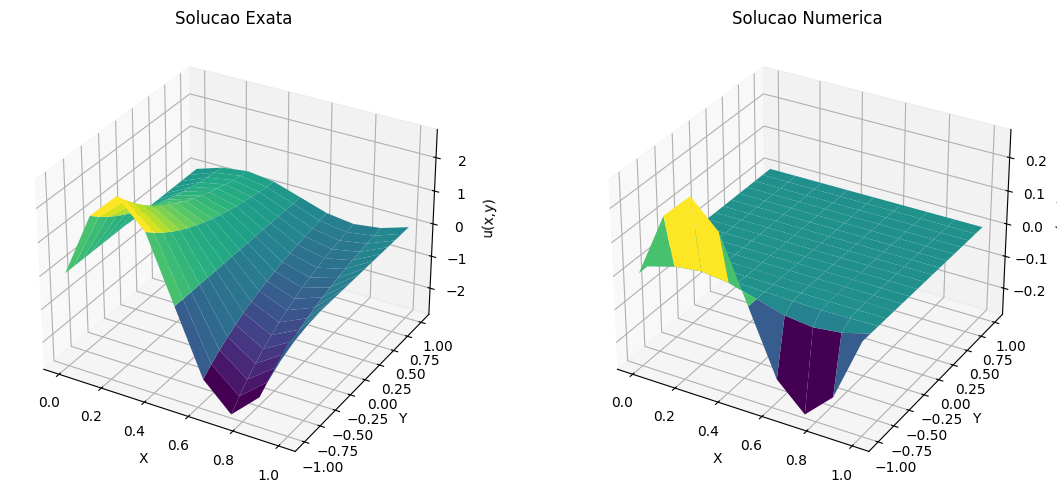

In [10]:
# Preparando Grid
X, Y = np.meshgrid(x,y)
exata = u(X,Y)

def transforma_solucao_1d_em_2d(U, Us):
    # Transformando solucao 1D em 2D
    U_2d = []
    for line in Us.mesh:
        row = []
        for point in line:
            row.append(U[point.ui])
        U_2d.append(row)
    return U_2d

U_2d = transforma_solucao_1d_em_2d(U, Us)
U_2d = np.array(U_2d)


# Adicionando Condicoes de Contorno (zeros) nas bordas
zeros_column = np.zeros((len(U_2d), 1))
U_2d = np.hstack((zeros_column, U_2d, zeros_column))



# Checando dimensoes
print(f"Numerica dim: {len(U_2d)} linhas e {len(U_2d[0])} colunas")
print(f"Exata dim: {len(exata)} linhas e {len(exata[0])} colunas")


# Plotando Solucao Exata e Solucao Numerica
fig = plt.figure()
fig = plt.figure(figsize=(12, 5))

# Primeiro subplot para solucao exata
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X, Y, exata, cmap='viridis')
ax1.set_title('Solucao Exata')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('u(x,y)')

# Segundo subplot para solucao numerica
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(X, Y, U_2d, cmap='viridis')
ax2.set_title('Solucao Numerica')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('u(x,y)')

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

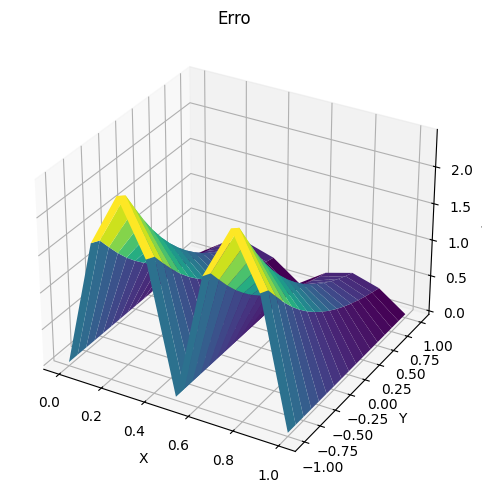

In [11]:
# Preparando Grid
X, Y = np.meshgrid(x,y)
exata = u(X,Y)

def transforma_solucao_1d_em_2d(U, Us):
    # Transformando solucao 1D em 2D
    U_2d = []
    for line in Us.mesh:
        row = []
        for point in line:
            row.append(U[point.ui])
        U_2d.append(row)
    return U_2d


U_2d = transforma_solucao_1d_em_2d(U, Us)
U_2d = np.array(U_2d)



# Adicionando Condicoes de Contorno (zeros) nas bordas
zeros_column = np.zeros((len(U_2d), 1))
U_2d = np.hstack((zeros_column, U_2d, zeros_column))

# Espelhando U_2d pela dimensao y (flip the matrix horizontally) pois a solucao exata esta definida em y decrescente 
                                                                                    # e a solucao numerica em y crescente    



erro_absoluto = np.abs(exata - U_2d)


# Plotando Solucao Exata e Solucao Numerica
fig = plt.figure()
fig = plt.figure(figsize=(12, 5))

# Primeiro subplot para solucao exata
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X, Y, erro_absoluto, cmap='viridis')
ax1.set_title('Erro')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('u(x,y)')

plt.tight_layout()
plt.show()

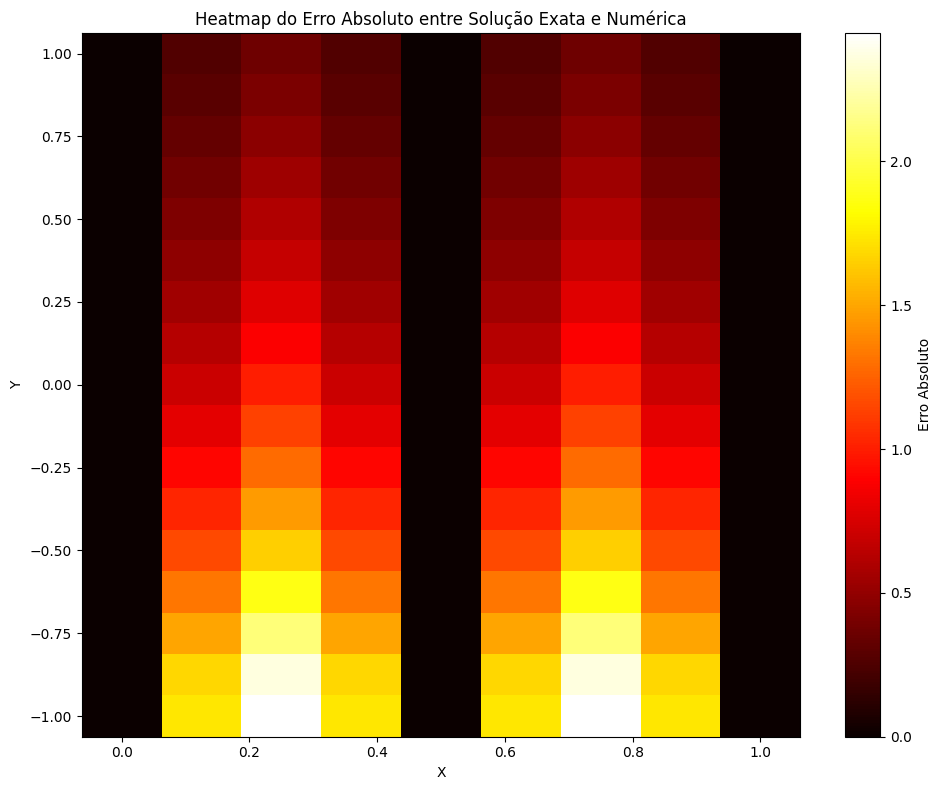

Erro máximo: 2.446556e+00
Erro médio: 6.331113e-01


In [12]:
# Calculando o erro absoluto entre a solução exata e numérica
erro_absoluto = np.abs(exata - U_2d)

# Criando um heatmap do erro
plt.figure(figsize=(10, 8))
heatmap = plt.pcolormesh(X, Y, erro_absoluto, cmap='hot', shading='auto')
plt.colorbar(heatmap, label='Erro Absoluto')
plt.title('Heatmap do Erro Absoluto entre Solução Exata e Numérica')
plt.xlabel('X')
plt.ylabel('Y')
plt.tight_layout()
plt.show()

# Calculando estatísticas do erro
erro_maximo = np.max(erro_absoluto)
erro_medio = np.mean(erro_absoluto)
print(f"Erro máximo: {erro_maximo:.6e}")
print(f"Erro médio: {erro_medio:.6e}")


In [13]:
# Limpando variaveis do computador para ram ficar mais vazia para o estudo de convergencia!!
%whos

del A, U, F, Malha, Us, U_2d, X, Y, ax1, ax2,c, erro_maximo, erro_medio, erro_absoluto, fig, get_1d_index, h, heatmap
del line, m, n, max_error, num_points, print_matrix, total_error, x, y, zeros_column




Variable                      Type        Data/Info
---------------------------------------------------
A                             ndarray     119x119: 14161 elems, type `float64`, 113288 bytes (110.6328125 kb)
F                             ndarray     119: 119 elems, type `float64`, 952 bytes
Malha                         Mesh        -------------------------<...>--\n17 linhas e 9 colunas
Mesh                          type        <class '__main__.Mesh'>
Ponto                         type        <class '__main__.Ponto'>
U                             ndarray     119: 119 elems, type `float64`, 952 bytes
U_2d                          ndarray     17x9: 153 elems, type `float64`, 1224 bytes
Us                            Mesh        -------------------------<...>--\n17 linhas e 7 colunas
X                             ndarray     17x9: 153 elems, type `float64`, 1224 bytes
Y                             ndarray     17x9: 153 elems, type `float64`, 1224 bytes
ax1                           A

In [14]:
%whos

Variable                      Type        Data/Info
---------------------------------------------------
Mesh                          type        <class '__main__.Mesh'>
Ponto                         type        <class '__main__.Ponto'>
exata                         ndarray     17x9: 153 elems, type `float64`, 1224 bytes
montar_sistema                function    <function montar_sistema at 0x774d9c4b3250>
np                            module      <module 'numpy' from '/ho<...>kages/numpy/__init__.py'>
plt                           module      <module 'matplotlib.pyplo<...>es/matplotlib/pyplot.py'>
point                         Ponto       (16, 7)
transforma_solucao_1d_em_2d   function    <function transforma_solu<...>_em_2d at 0x774d9c3951b0>
u                             function    <function u at 0x774d9c4b24d0>


### Tarefa 3: Estudo de convergência do método numérico

------------------------
Running for: 0.25
Número esperado de pontos interiores: 21
Tamanho de U: 27
------------------------
Running for: 0.125
Número esperado de pontos interiores: 105
Tamanho de U: 119
------------------------
Running for: 0.1
Número esperado de pontos interiores: 171
Tamanho de U: 189
------------------------
Running for: 0.05
Número esperado de pontos interiores: 741
Tamanho de U: 779
------------------------
Running for: 0.025
Número esperado de pontos interiores: 3081
Tamanho de U: 3159
------------------------
Running for: 0.02
Número esperado de pontos interiores: 4851
Tamanho de U: 4949


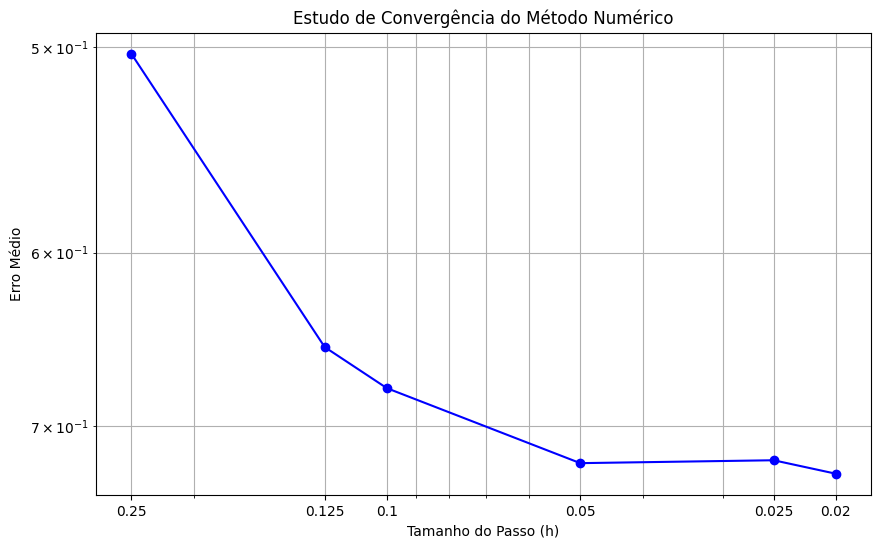

In [15]:
def estudo_de_convergencia(h_values):
    errors = []
    for hi in h_values:
        x = np.arange(0,1+hi, hi)   # discretização do eixo-x
        y = np.arange(1,-1-hi, -hi)  # discretização do eixo-y

        n = len(x)  # número de COLUNAS na malha
        m = len(y)  # número de LINHAS da malha

        X, Y = np.meshgrid(x,y)
        exata = u(X,Y)

        Malha = Mesh(m, n)
        Malha.populate_coordinates(hi)
        Malha.exact_solution(hi)

        Us = Malha.get_unkown_points()  # Retorna a malha sem os pontos do bordo
        Us.populate_coordinates(hi)
        Us.exact_solution(hi)
        A, F = montar_sistema(Us, hi)
        U = np.linalg.solve(A, F)
        
        # Adicione verificação de tamanho para depuração
        print("------------------------")
        print(f"Running for: {hi}")
        print(f"Número esperado de pontos interiores: {(m-2)*(n-2)}")
        print(f"Tamanho de U: {len(U)}")

        
        U_2d = transforma_solucao_1d_em_2d(U, Us)

        zeros_column = np.zeros((len(U_2d), 1))
        U_2d = np.hstack((zeros_column, U_2d, zeros_column))

        U_2d = np.fliplr(U_2d)

        erro_absoluto = np.abs(exata - U_2d)
        erro_medio = np.mean(erro_absoluto)
        errors.append(erro_medio)
    return errors


h_values = [0.25, 0.125, 0.1, 0.05, 0.025, 0.02]
errors = estudo_de_convergencia(h_values)

plt.figure(figsize=(10, 6))
plt.loglog(h_values, errors, marker='o', linestyle='-', color='b')
plt.xlabel('Tamanho do Passo (h)')
plt.ylabel('Erro Médio')
plt.title('Estudo de Convergência do Método Numérico')

# Set ticks and labels
plt.xticks(h_values, [str(h) for h in h_values])

# Invert x-axis for increasing h left to right
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()


plt.grid(True, which='both')
plt.show()